# Feature Selection - Feature Dimension Reduction Using LDA and PCA

#### What is LDA (Linear Discriminant Analysis)?
The idea behind LDA is simple. Mathematically speaking, we need to find a new feature space to project the data in order to maximize classes separability

Linear Discriminant Analysis is a supervised algorithm as it takes the class label into consideration. It is a way to reduce ‘dimensionality’ while at the same time preserving as much of the class discrimination information as possible.

LDA helps you find the boundaries around clusters of classes. It projects your data points on a line so that your clusters are as separated as possible, with each cluster having a relative (close) distance to a centroid.

So the question arises- how are these clusters are defined and how do we get the reduced feature set in case of LDA?

Basically LDA finds a centroid of each class datapoints. For example with thirteen different features LDA will find the centroid of each of its class using the thirteen different feature dataset. Now on the basis of this, it determines a new dimension which is nothing but an axis which should satisfy two criteria:

 - Maximize the distance between the centroid of each class.
 - Minimize the variation (which LDA calls scatter and is represented by s2), within each category.
 
#### What is PCA
Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

Dimensions are nothing but features that represent the data. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image.

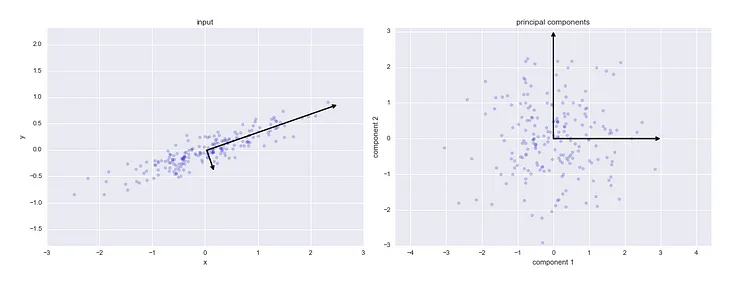

One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels), and you will learn how to achieve this practically using Python in later sections of this tutorial!

According to Wikipedia, PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

#### When to use PCA

##### Data Visualization:
When working on any data related problem, the challenge in today’s world is the sheer volume of data, and the variables/features that define that data. To solve a problem where data is the key, you need extensive data exploration like finding out how the variables are correlated or understanding the distribution of a few variables. Considering that there are a large number of variables or dimensions along which the data is distributed, visualization can be a challenge and almost impossible.

##### Speeding Machine Learning (ML) Algorithm:
Since PCA’s main idea is dimensionality reduction, you can leverage that to speed up your machine learning algorithm’s training and testing time considering your data has a lot of features, and the ML algorithm's learning is too slow.

##### How to do PCA
We can calculate a Principal Component Analysis on a dataset using the PCA() class in the scikit-learn library. The benefit of this approach is that once theprojection is calculated, it can be applied to new data again and again quite easily.

When creating the class, the number of components can be specified as a parameter.

The class is first fit on a dataset by calling the fit() function, and then the original dataset or other data can be projected into a subspace with the chosen number of dimensions by calling the transform() function.

Once fit, the eigenvalues and principal components can be accessed on the PCA class via the explainedvariance and components_ attributes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# VarianceThreshold - Feature selector that removes all low-variance features.
from sklearn.feature_selection import VarianceThreshold

In [3]:
data = pd.read_csv("data/santander.csv", nrows=20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
x = data.drop("TARGET", axis=1) # Features
y = data["TARGET"] # Outcome

x.shape, y.shape

((20000, 370), (20000,))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16000, 370), (4000, 370), (16000,), (4000,))

### Constant Features Removal

In [6]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(x_train)

VarianceThreshold(threshold=0)

In [7]:
# No. of features after constants removal
constant_filter.get_support().sum()

291

In [8]:
# Returns True for all the features which are constants.
constant_list = [not temp for temp in constant_filter.get_support()] # Inversing the True to False and False to True
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

In [9]:
# Name of all the features which are constants
x.columns[constant_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var34', 'saldo_var41', 'saldo_var46',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1',
       'imp

In [10]:
# removing all the constants from our Training and Test dataset.
x_train_filter = constant_filter.transform(x_train)
x_test_filter = constant_filter.transform(x_test)

In [11]:
# Now take a look at the original and the transformed data (after removing the constants)
x_train.shape, x_test.shape, x_train_filter.shape, x_test_filter.shape

((16000, 370), (4000, 370), (16000, 291), (4000, 291))

## Quasi Constants Feature Removal

In [12]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)

In [13]:
quasi_constant_filter.fit(x_train_filter)

VarianceThreshold(threshold=0.01)

In [14]:
quasi_constant_filter.get_support().sum()

245

In [15]:
x_train_quasi_filter = quasi_constant_filter.transform(x_train_filter)
x_test_quasi_filter = quasi_constant_filter.transform(x_test_filter)

In [16]:
# Now take a look at the original and the transformed data (after removing the constants)
x_train.shape, x_test.shape, x_train_filter.shape, x_test_filter.shape, x_train_quasi_filter.shape, x_train_quasi_filter.shape

((16000, 370),
 (4000, 370),
 (16000, 291),
 (4000, 291),
 (16000, 245),
 (16000, 245))

## Duplicate Features Removal

In [17]:
x_train_T = x_train_quasi_filter.T
x_test_T = x_test_quasi_filter.T

In [18]:
# As we can see the pandas dataframe has been transformed in to numpy array after transpose.
type(x_train_T)

numpy.ndarray

In [19]:
# Changing numpy array back to pandas dataframe
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)

In [20]:
# Now we can see after transpose the rows has become columns and columns has become rows.
x_train_T.shape, x_test_T.shape

((245, 16000), (245, 4000))

In [21]:
# Getting duplicate features count
x_train_T.duplicated().sum()

18

In [22]:
duplicated_features = x_train_T.duplicated()
duplicated_features

# True is duplicated and False is non duplicated rows.

0      False
1      False
2      False
3      False
4      False
       ...  
240    False
241    False
242    False
243    False
244    False
Length: 245, dtype: bool

In [23]:
# Removing duppicated features.
# After this the False becomes True and True becomes false.

# Inversing the True to False and False to True
features_to_keep = [not index for index in duplicated_features]
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 Fals

In [24]:
# Final dataset after removing constants, quasi constants and duplicates.

# Transposing again to original form
x_train_unique = x_train_T[features_to_keep].T 

# Transposing again to original form
x_test_unique = x_test_T[features_to_keep].T

In [25]:
x_train.shape, x_test.shape, x_train_unique.shape, x_test_unique.shape

((16000, 370), (4000, 370), (16000, 227), (4000, 227))

## Build Model and Compare the Performance after and before removal.

In [26]:
def run_random_forest(x_train, x_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Accuracy on test set: ")
    print(accuracy_score(y_test, y_pred))

In [27]:
%%time
# Run on final data.
run_random_forest(x_train_unique, x_test_unique, y_train, y_test)

Accuracy on test set: 
0.95875
CPU times: user 6.75 s, sys: 138 ms, total: 6.89 s
Wall time: 3.04 s


In [28]:
%%time
# Run on original data.
run_random_forest(x_train, x_test, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 7.74 s, sys: 163 ms, total: 7.9 s
Wall time: 3.46 s


As we can see the accuracy and time taken is less after removing the constants, quasi constants and duplicates compare to the original data. 

What we can say here is that removing constants, quasi constants and duplicates doesn't depricates the accuracy it rather improves it.

## Removing Correlated Data 

In [29]:
corrmat = x_train_unique.corr()

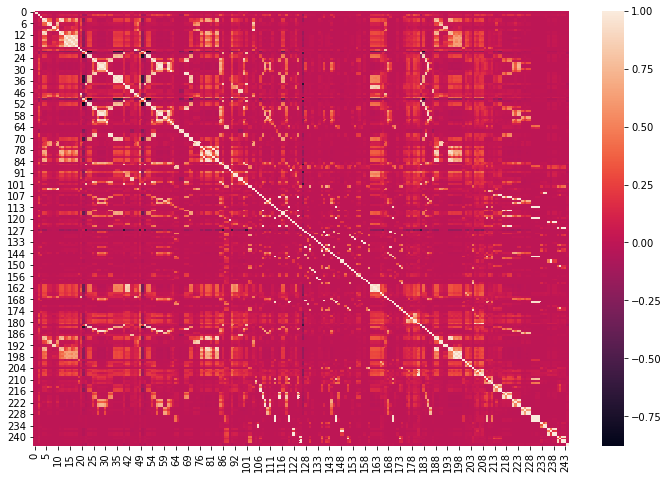

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(corrmat)

In [31]:
# data -  Training or Testing data
# threshold - Point after which the data will be discarded
def get_correlation(data, threshold):
    
    corr_col = set()
    corrmat = data.corr()
    
    # Navigating from feature to feature
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col                

In [36]:
corr_features = get_correlation(x_train_unique, 0.70)
corr_features

{5,
 7,
 9,
 10,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 23,
 24,
 26,
 28,
 29,
 30,
 32,
 33,
 34,
 35,
 36,
 38,
 40,
 42,
 46,
 47,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 65,
 67,
 68,
 69,
 70,
 72,
 75,
 76,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 91,
 93,
 95,
 98,
 100,
 101,
 103,
 104,
 109,
 110,
 111,
 115,
 117,
 119,
 120,
 121,
 125,
 136,
 138,
 143,
 145,
 146,
 149,
 153,
 154,
 157,
 158,
 161,
 162,
 163,
 164,
 167,
 168,
 169,
 170,
 171,
 173,
 174,
 179,
 180,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 197,
 198,
 199,
 204,
 205,
 206,
 207,
 208,
 210,
 211,
 212,
 213,
 215,
 216,
 217,
 219,
 220,
 221,
 223,
 224,
 225,
 227,
 228,
 229,
 230,
 231,
 232,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243}

In [37]:
len(corr_features)

148

In [38]:
# Removing all correlated features
x_train_uncorr = x_train_unique.drop(labels=corr_features, axis=1)
x_test_uncorr = x_test_unique.drop(labels=corr_features, axis=1)

In [39]:
x_train_uncorr.shape, x_test_uncorr.shape

((16000, 79), (4000, 79))

## Feature Dimension Reduction Using LDA

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [41]:
lda = LDA(n_components=1) # n_components = No of available classes - 1. But for LDA its always 1.

In [43]:
x_train_lda = lda.fit_transform(x_train_uncorr, y_train)
x_test_lda = lda.transform(x_test_uncorr)

In [44]:
x_train_lda.shape, x_test_lda.shape

((16000, 1), (4000, 1))

In [45]:
%%time
run_random_forest(x_train_lda, x_test_lda, y_train, y_test)

Accuracy on test set: 
0.93025
CPU times: user 3.58 s, sys: 87.1 ms, total: 3.66 s
Wall time: 1.66 s


In [46]:
%%time
# Original Data
run_random_forest(x_train, x_test, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 7.75 s, sys: 207 ms, total: 7.96 s
Wall time: 3.47 s


Here we can see the accuracy has gone down after LDA. But the time taken is very less compare to original data.

## Feature Dimension Reduction Using PCA

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components=2, random_state=42)
pca.fit(x_test_uncorr)

PCA(n_components=2, random_state=42)

In [49]:
x_train_pca = pca.fit_transform(x_train_uncorr, y_train)
x_test_pca = pca.transform(x_test_uncorr)

In [50]:
x_train_pca.shape, x_test_pca.shape

((16000, 2), (4000, 2))

In [51]:
%%time
run_random_forest(x_train_pca, x_test_pca, y_train, y_test)

Accuracy on test set: 
0.95925
CPU times: user 727 ms, sys: 94.7 ms, total: 822 ms
Wall time: 671 ms


In [52]:
%%time
# Original Data
run_random_forest(x_train, x_test, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 7.59 s, sys: 206 ms, total: 7.8 s
Wall time: 3.48 s


Here we can see the accuracy is pretty much same after PCA and also the total time is significantly less. Also, increasing the n_components increases the accuracy. n_component can be raised upto No of available classes - 1 i.e., 79 - 1 = 78.

## Lets try in a loop and find where the highest accuracy is for n_components.

In [53]:
for component in range(1, 79):
    pca = PCA(n_components=component, random_state=42)
    pca.fit(x_test_uncorr)
    x_train_pca = pca.fit_transform(x_train_uncorr, y_train)
    x_test_pca = pca.transform(x_test_uncorr) 
    print("Selected Components: ", component)
    run_random_forest(x_train_pca, x_test_pca, y_train, y_test)
    print()

Selected Components:  1
Accuracy on test set: 
0.95925

Selected Components:  2
Accuracy on test set: 
0.95925

Selected Components:  3
Accuracy on test set: 
0.95925

Selected Components:  4
Accuracy on test set: 
0.959

Selected Components:  5
Accuracy on test set: 
0.959

Selected Components:  6
Accuracy on test set: 
0.92125

Selected Components:  7
Accuracy on test set: 
0.92225

Selected Components:  8
Accuracy on test set: 
0.92425

Selected Components:  9
Accuracy on test set: 
0.95425

Selected Components:  10
Accuracy on test set: 
0.956

Selected Components:  11
Accuracy on test set: 
0.957

Selected Components:  12
Accuracy on test set: 
0.9565

Selected Components:  13
Accuracy on test set: 
0.95675

Selected Components:  14
Accuracy on test set: 
0.95675

Selected Components:  15
Accuracy on test set: 
0.95675

Selected Components:  16
Accuracy on test set: 
0.95725

Selected Components:  17
Accuracy on test set: 
0.95675

Selected Components:  18
Accuracy on test set: 
0